# Hack the Feed: Insights from Social Media Data

**Author:** Aregbesola Samuel 

In [1]:
# Additional libraries installs
# %pip install missingno

In [2]:
# imports
import pandas as pd # library for data manipulation and analysis
import numpy as np # library for scientific computing
import matplotlib.pyplot as plt # library for visualizing data
import seaborn as sns # library for visualizing data
import missingno as msno # library for visualizing missing values

import warnings # library to ignore warnings
warnings.filterwarnings('ignore')

# set option to display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# import data
facebook = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')
instagram = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')
linkedin = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv')
twitter = pd.read_csv('./data/Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')

In [9]:
# Check dataframe dimensions
print(facebook.shape)
print(instagram.shape)
print(linkedin.shape)
print(twitter.shape)

(9803, 57)
(10000, 20)
(7760, 21)
(8529, 34)


In [12]:
# Create a copy of the dataframes
facebook_copy = facebook.copy()
instagram_copy = instagram.copy()
linkedin_copy = linkedin.copy()
twitter_copy = twitter.copy()

---
## Data Cleaning

In this section, we will try to fix quality issues including but not limited to 

* Dropping columns where 80% of observations are missing/null because they are not useful for the analysis.
* Check for duplicates
* Fix issues with missing observations
* Fix issues with wrong datatypes
* Fix issues with inconsistent / wrong formatting


In [13]:
# Helper function
def delete_80_null(df):
    """
    This function will delete columns with atleast 80% null values
    """
    # get columns where null values are >= 80%
    null_columns = list(df.columns[df.isnull().sum() >= 0.8*len(df)])
    # get the columns that are not in the null_columns
    df = df[[col for col in df.columns if col not in null_columns]]
    # return the dataframe
    return df

In [16]:
# Helper function
def check_missing(df):
    """
    This function will check for missing values in the dataframe
    """
    # get the total number of missing values
    total = df.isnull().sum().sort_values(ascending=False)
    # get the percentage of missing values
    percent = round((df.isnull().sum()/df.isnull().count()*100),2).sort_values(ascending=False)
    # create a dataframe of the missing values
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # return the dataframe
    return missing_data

In [20]:
# Helper function
def remove_percent(df):
    """
    This function will remove the percent sign from the dataframe
    """
    # get the columns with percent sign
    percent_columns = [col for col in df.columns if '%' in col]
    # remove the percent sign
    for col in percent_columns:
        df[col] = df[col].str.replace('%', '')
    # return the dataframe
    return df

In [ ]:
# Helper function
def convert_date(df):
    """
    This function will convert the date column to datetime format
    """
    # convert the date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    # return the dataframe
    return df

In [ ]:
# Helper function
def convert_numeric(df):
    """
    This function will convert the columns to numeric
    """
    # get the columns with percent sign
    numeric_columns = [col for col in df.columns if df[col].dtype == 'object']
    # convert the columns to numeric
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col])
    # return the dataframe
    return df

In [22]:
# Helper function
def convert_category(df):
    """
    This function will convert the columns to category
    """
    # get the columns with percent sign
    category_columns = [col for col in df.columns if df[col].dtype == 'object']
    # convert the columns to category
    for col in category_columns:
        df[col] = df[col].astype('category')
    # return the dataframe
    return df

In [17]:
# delete columns with atleast 80% null values
facebook = delete_80_null(facebook)
instagram = delete_80_null(instagram)
linkedin = delete_80_null(linkedin)
twitter = delete_80_null(twitter)

# Check new dataframe dimensions
print(facebook.shape)
print(instagram.shape)
print(linkedin.shape)
print(twitter.shape)

(9803, 57)
(10000, 20)
(7760, 21)
(8529, 34)


In [18]:
check_missing(facebook)

,Total,Percent
Post Photo View Clicks,2122,21.65
Unique Post Photo View Clicks,2122,21.65
Engagement Rate (per Reach),2062,21.03
Engagement Rate (per Impression),2059,21.00
Unique Post Clicks,910,9.28
Unique Answers,910,9.28
Reactions,910,9.28
Likes,910,9.28
Love Reactions,910,9.28
Haha Reactions,910,9.28


In [19]:
facebook.shape

(9803, 57)

In [13]:
# Posts with ads 
post_with_ads = facebook[(facebook['Impressions'] != facebook['Organic Impressions'])
            ]

In [14]:
post_with_ads.head(2)

,Date,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,Fan Organic Impressions,Non-fan Impressions,Non-fan Organic Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Fan Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Photo View Clicks,Answers,Negative Feedback,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Photo View Clicks,Unique Other Post Clicks,Unique Negative Feedback
12,2017-09-17 11:37:00,Photo,Other,"This EPL #Supersunday, it's the Blues against ...",95300.0,59484.0,35816.0,59484.0,57181.0,57181.0,38119.0,2303.0,56094.0,38717.0,18384.0,38717.0,35590.0,5.49,9.32,5230.0,641.0,631.0,6.0,0.0,4.0,0.0,0.0,1050.0,96.0,0.0,3443.0,3443.0,1305.0,0.0,7.0,2431.0,1974.0,1398.0,620.0,955.0,95.0,0.0,1948.0,717.0,1628.0,6.0
15,2019-09-03 11:43:00,Photo,Aramide Salami,Every human life is a precious gift to humanit...,70855.0,70787.0,35336.0,35449.0,37836.0,37836.0,33019.0,32951.0,52185.0,52185.0,24829.0,29127.0,30207.0,5.25,7.12,3717.0,669.0,622.0,23.0,2.0,0.0,2.0,20.0,186.0,187.0,0.0,2675.0,2675.0,585.0,0.0,1.0,2573.0,1591.0,852.0,649.0,120.0,170.0,0.0,1993.0,563.0,1679.0,1.0


In [16]:
post_with_ads.shape[0]

244

In [18]:
post_without_ads = facebook[(facebook['Impressions'] == facebook['Organic Impressions'])]

In [19]:
post_without_ads.shape[0]

8649

In [28]:
facebook['Content Type'].value_counts() 

Photo    7615
Video     909
Text      275
Link       94
Name: Content Type, dtype: int64

In [29]:
#compare ctr of post with ads and post without ads
post_with_ads[post_with_ads['Content Type'] == 'Link']['Click-Through Rate'].mean()

0.34500000000000003

In [31]:
#compare ctr of post with ads and post without ads
post_without_ads[post_without_ads['Content Type'] == 'Link']['Click-Through Rate'].mean()

0.39568181818181825

In [36]:
# compare engagement of post with ads and post with ads
pd.DataFrame(post_with_ads[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']].mean())

,0
Engagement Rate (per Impression),6.646311
Engagement Rate (per Reach),9.463443


In [37]:
# compare engagement of post with ads and post without ads
pd.DataFrame(post_without_ads[['Engagement Rate (per Impression)', 'Engagement Rate (per Reach)']].mean())

,0
Engagement Rate (per Impression),5.180753
Engagement Rate (per Reach),5.504623


In [38]:
#new column for facebook called length of post
facebook['post_length'] = facebook['Post'].str.len()

<AxesSubplot:>

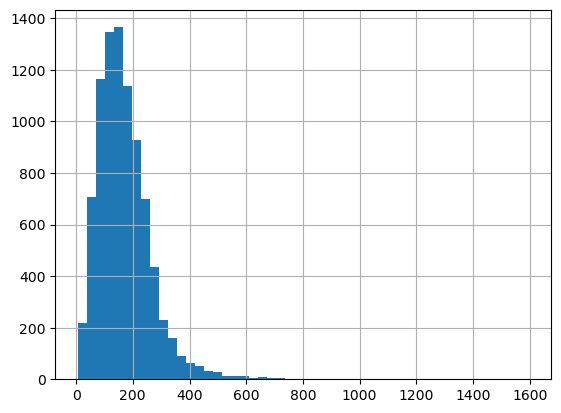

In [43]:
# histogram of post length with four bins
facebook['post_length'].hist(bins=50)

In [44]:
facebook['post_length'].value_counts()

132.0    60
101.0    56
123.0    55
100.0    55
156.0    54
         ..
566.0     1
429.0     1
593.0     1
619.0     1
678.0     1
Name: post_length, Length: 547, dtype: int64

In [45]:
# return all similar columns in the four dataframes
def similar_columns(df1, df2, df3, df4):
    df1_cols = df1.columns
    df2_cols = df2.columns
    df3_cols = df3.columns
    df4_cols = df4.columns
    similar_cols = []
    for col in df1_cols:
        if col in df2_cols and col in df3_cols and col in df4_cols:
            similar_cols.append(col)
    return similar_cols

In [48]:
similar_columns(facebook, instagram, twitter, linkedin)

['Date',
 'Content Type',
 'Sent by',
 'Post',
 'Impressions',
 'Engagement Rate (per Impression)',
 'Engagements',
 'Reactions',
 'Likes',
 'Comments']